## Домашнее задание №7 к занятию от 21.11.2019 г. «Теория вероятности. Дискретные С.В.»
ФИО: Кривова Татьяна Сергеевна

### Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа (решение на бумажке и на python).

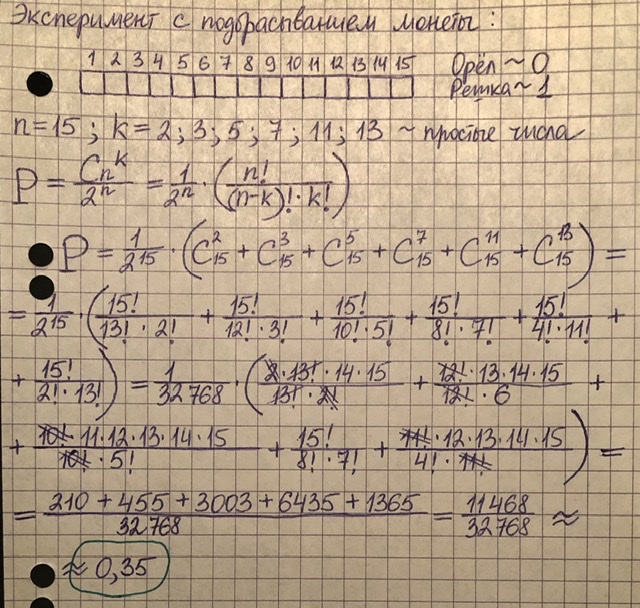

In [1]:
from PIL import Image
img_71 = Image.open("z711.jpeg")
img_71

In [2]:
from random import randint as rnd

def coin_flips(trials):
    results = {0:0, 1:0} # 0 - Орел, 1 - Решка
    for i in range(trials):
        result = rnd(0, 1)
        for key,value in results.items():
            if result == key: results[key]+=1
    return list(results.values())[1] # количество выпадений Решки

In [3]:
trials = 15
n_experiments = 10**6
spisok = []

for j in range(n_experiments):
    sum_reshka = coin_flips(trials)
    spisok.append(sum_reshka) # сохраняем в список, сколько раз выпала Решка из n_experiments 

In [4]:
prime_nums = [2, 3, 5, 7, 11, 13] # простые числа
counter = 0 # счетчик количества простых чисел из n_experiments

for element in spisok:
    if element in prime_nums: counter+=1

print(f'Вероятность выпадения простого числа: {counter/n_experiments}')

Вероятность выпадения простого числа: 0.35055


### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [6]:
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

In [7]:
values = [-7.5, -5, 0, 5, 7.5, 10, 12.5, 15, 17.5, 20, 99] # значения упорядочены по возрастанию
probabilities = [0.2, 0.1, 0.1, 0.05, 0.025, 0.125, 0.025, 0.025, 0.05, 0.05, 0.25] # соответствующие вероятности

len(values) == len(probabilities) # проверка
sum(probabilities)

True

1.0000000000000002

In [8]:
X = np.array([ values, probabilities ]) 
print(f'Закон распределения дискретной случайной величины X:\n{X}')

Закон распределения дискретной случайной величины X:
[[-7.50e+00 -5.00e+00  0.00e+00  5.00e+00  7.50e+00  1.00e+01  1.25e+01
   1.50e+01  1.75e+01  2.00e+01  9.90e+01]
 [ 2.00e-01  1.00e-01  1.00e-01  5.00e-02  2.50e-02  1.25e-01  2.50e-02
   2.50e-02  5.00e-02  5.00e-02  2.50e-01]]


In [9]:
summa = 0
for i in zip(values, probabilities):
    summa+=i[0]*i[1]

mu_X = summa # среднее значение
print(f'Математическое ожидание дискретной случайной величины X: {mu_X}')

Математическое ожидание дискретной случайной величины X: 27.0


In [10]:
len(values)/2 # находим порядковый номер элемента: округляем в бОльшую сторону, т.к. нечетное количество значений

median_X = values[5] # шестой элемент является медианой

print(f'Медиана дискретной случайной величины X: {median_X}') 

5.5

Медиана дискретной случайной величины X: 10


In [11]:
summa = 0
for i in range(len(values)):
    summa+=((values[i] - mu_X)**2)*probabilities[i]

disp_X = summa # дисперсия
print(f'Дисперсия дискретной случайной величины X: {disp_X}') 

Дисперсия дискретной случайной величины X: 1795.0


In [12]:
sample_size = 1000
sample = np.random.choice(values, size=sample_size, p=probabilities) # выборка из 1000 значений

results = {} # Количество встречаемости значений values в выборке sample 

for element in values:
    results[element] = list(sample).count(element)
results

sum(results.values()) == sample_size # проверка

{-7.5: 208,
 -5: 102,
 0: 96,
 5: 56,
 7.5: 29,
 10: 117,
 12.5: 22,
 15: 27,
 17.5: 46,
 20: 52,
 99: 245}

True

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Гистограмма плотности распределения по выборке sample (plt.bar)')

Text(0.5, 0, 'Значение случайной величины X')

Text(0, 0.5, 'Количество встречаемости значения')

<function matplotlib.pyplot.show(*args, **kw)>

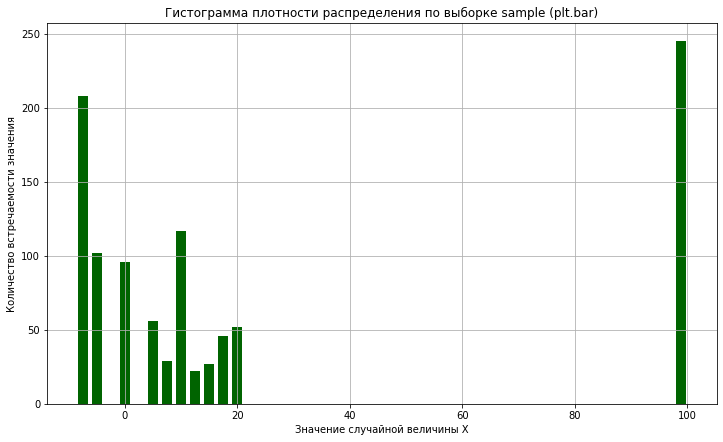

In [13]:
x = values
y = results.values()

rcParams['figure.figsize'] = 12,7
plt.bar(x, height=y, width = 1.8, color='darkgreen')
         
plt.title('Гистограмма плотности распределения по выборке sample (plt.bar)')
plt.grid(True)
plt.xlabel('Значение случайной величины X')
plt.ylabel('Количество встречаемости значения')
plt.show

In [14]:
summa = 0
for key, value in results.items():
    summa+=key*value/sample_size
    
mu_sample = summa # среднее значение
print(f'Математическое ожидание по выборке sample: {mu_sample}')

Математическое ожидание по выборке sample: 26.377499999999998


In [15]:
summa = 0
for key, value in results.items():
    summa+=((key - mu_sample)**2)*value/sample_size

disp_sample = summa # дисперсия
print(f'Дисперсия по выборке sample: {disp_sample}') 

Дисперсия по выборке sample: 1778.85374375


### Задание 3

Задача с 17-го слайда лекции про 3 монеты. Покажите, почему 3 события являются попарно независимыми, но <b>не</b> являются независимыми в совокупности.

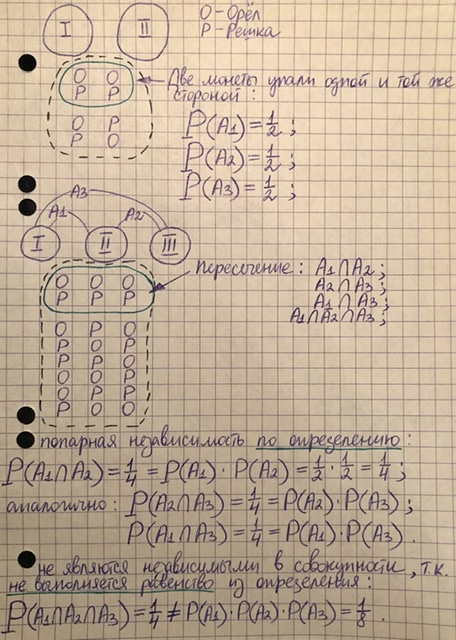

In [16]:
img_73 = Image.open("z731.jpeg")
img_73

### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

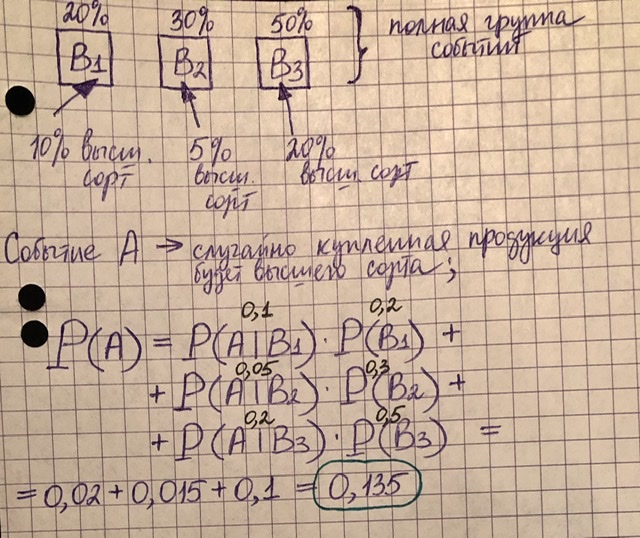

In [17]:
img_74 = Image.open("z741.jpeg")
img_74